# Lista 14

In [13]:
import time
import matplotlib.pyplot as plt

In [14]:
def sievePrimes0(candidates):
	for i in range(0, int(len(candidates) ** 0.5 + 1)):
		currentPrime = candidates[i]
		if currentPrime != 0:
			for j in range(i + currentPrime, len(candidates), currentPrime):
				if candidates[j] % candidates[i] == 0:
					candidates[j] = 0
	return filter(lambda x : x != 0, candidates)

def sievePrimes1(l):
	if l[0] * l[0] <= l[len(l) - 1]:
		l[1:] = sievePrimes1(list(filter(lambda x: x % l[0] != 0, l)))
	return l

In [15]:
def timeSieve(maxPrime, numTimes, sieveFunc):
	t0 = 0
	for numTries in range(0, numTimes):
		taux = time.time()
		primes0 = sieveFunc(list(range(2, maxPrime)))
		t0 = t0 + time.time() - taux
	ttime = t0 / numTimes
	return ttime

In [16]:
def plotSieves():
	x = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
	y0 = []
	y1 = []
	for maxPrime in x:
		y0.append(timeSieve(maxPrime, 5, sievePrimes0))
		y1.append(timeSieve(maxPrime, 5, sievePrimes1))
	print ("y0: ", y0)
	print ("y1: ", y1)
	plt.plot(x, y0, 'r', x, y1, 'b')
	plt.show()


y0:  [5.865097045898438e-06, 1.02996826171875e-05, 1.8548965454101562e-05, 0.00011487007141113282, 0.00022788047790527343, 0.0012544155120849609, 0.002776432037353516, 0.019596624374389648, 0.036425304412841794, 0.15687661170959472]
y1:  [6.4373016357421875e-06, 2.6273727416992188e-05, 3.662109375e-05, 0.00024061203002929689, 0.0006011486053466797, 0.003537607192993164, 0.00813593864440918, 0.0957643985748291, 0.16410326957702637, 1.293116283416748]


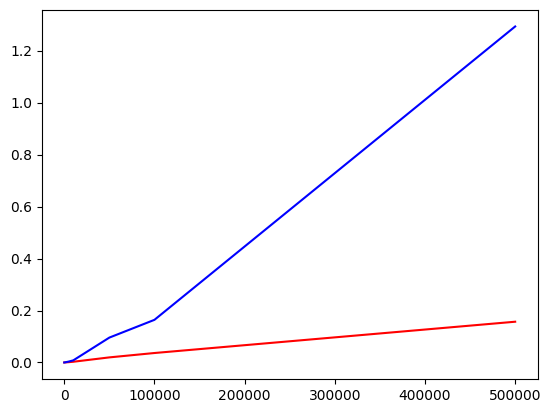

In [17]:
plotSieves()

In [18]:
def testPrimes():
	numTimes = int(input())
	for numTries in range(0, numTimes):
		maxPrime = int(input())
		sievePrimes0(list(range(2, maxPrime)))
		sievePrimes1(list(range(2, maxPrime)))

testPrimes()

In [19]:
def mystery(limit):
	nums = []
	for n in range(2, limit):
		for x in range(2, n):
			if n % x == 0:
				print("a")
				break
		else:
			print("b")
			nums.append(n)
	return nums

print (mystery(3))

b
[2]


In [20]:
def pydiv(n, d):
	if d != 0:
		return n / d

In [21]:
x = pydiv(1, 0)
print (x)
y = pydiv(1, 1)
print (y)

None
1.0


Both cells below have the same functionality, but the first one is more readable and the second one is more compact.

In [22]:
def perm(n, l):
	perml = []
	if len(l) == 1:
		return [l]
	else:
		if len(l) != n:
			for i in range(0, len(l)):
				auxl = l.copy()
				auxl.remove(auxl[i])
				aux = perm(n, auxl)
				for j in aux:
					if j not in perml:
						perml.append(j)
		else:
			for i in range(0, len(l)):
				auxl = l.copy()
				auxl.remove(auxl[i])
				aux = perm(n - 1, auxl)
				for j in aux:
					if [l[i]] + j not in perml:
						perml.append([l[i]] + j)

	return perml

In [23]:
def perm(n, l):
	perml = []
	if len(l) == 1:
		return [l]
	for i in range(0, len(l)):
		auxl = l.copy()
		auxl.remove(auxl[i])
		nn = n
		if len(l) == n:
			nn -= 1
		p = perm(nn, auxl)
		for j in p:
			aux = j
			if len(l) == n:
				aux = [l[i]] + aux
			if aux not in perml:
				perml.append(aux)
	return perml

In [24]:
x = perm(2, ['a', 'b', 'c', 'd', 'e'])
x

[['d', 'e'],
 ['e', 'd'],
 ['c', 'e'],
 ['e', 'c'],
 ['c', 'd'],
 ['d', 'c'],
 ['b', 'e'],
 ['e', 'b'],
 ['b', 'd'],
 ['d', 'b'],
 ['b', 'c'],
 ['c', 'b'],
 ['a', 'e'],
 ['e', 'a'],
 ['a', 'd'],
 ['d', 'a'],
 ['a', 'c'],
 ['c', 'a'],
 ['a', 'b'],
 ['b', 'a']]

In [25]:
def getStringList(i):
	l = list(map(str, str(i)))
	while len(l) != 4:
		l = ['0'] + l
	return l

In [26]:
def distinctDigits(l):
	for i in range(0, len(l)):
		for j in range(i + 1, len(l)):
			if l[i] == l[j]:
				return False
	return True
	

In [27]:
def getPrimePermutations(perml, primes):
	primePerm = []
	for i in range(len(perml) - 1, -1, -1):
		numStr = ''
		for j in range(0, len(perml[i])):
			numStr += perml[i][j]
		num = int(numStr)
		if num in primes:
			primePerm.append(num)
	return primePerm

In [28]:
def findAP(primePerm):
	for i in range(0, len(primePerm)):
		for j in range(i + 1, len(primePerm)):
			for k in range(j + 1, len(primePerm)):
				if abs(primePerm[j] - primePerm[i]) == abs(primePerm[k] - primePerm[j]):
					return [primePerm[i], primePerm[j], primePerm[k]]
	return []

In [29]:
def isInList(n, l):
	for i in l:
		if n in i:
			return True
	return False

In [30]:
def findSequences():
	sequences = []
	primes = sievePrimes1(list(range(2, 10000)))
	for p in primes:
		l = getStringList(p)
		if not distinctDigits(l):
			continue
		perml = perm(4, l)
		primePerm = getPrimePermutations(perml, primes)
		apPerm = findAP(primePerm)
		if len(apPerm) > 0:
			if not isInList(apPerm[0], sequences):
				sequences.append(apPerm)
	return sequences


In [31]:
findSequences()

[[1063, 613, 163], [7039, 3709, 379], [8147, 4817, 1487]]

# Lista 15

First-Fit

Given by the exercise

In [37]:
NULL = -1 # The null link

class HeapManager:
  """Implements a very simple heap manager."""

  def __init__(self, initialMemory):
    """Constructor. Parameter initialMemory is the array of data that we will
       use to represent the memory."""
    self.memory = initialMemory
    self.memory[0] = self.memory.__len__()
    self.memory[1] = NULL
    self.freeStart = 0


  def allocate(self, requestSize):
    """Allocates a block of data, and return its address. The parameter
       requestSize is the amount of space that must be allocaed."""
    size = requestSize + 1
    # Do first-fit search: linear search of the free list for the first block
    # of sufficient size.
    p = self.freeStart
    lag = NULL
    while p != NULL and self.memory[p] < size:
      lag = p
      p = self.memory[p + 1]
    if p == NULL:
      raise MemoryError()
    nextFree = self.memory[p + 1]
    # Now p is the index of a block of sufficient size,
    # lag is the index of p's predecessor in the
    # free list, or NULL, and nextFree is the index of
    # p's successor in the free list, or NULL.
    # If the block has more space than we need, carve
    # out what we need from the front and return the
    # unused end part to the free list.
    unused = self.memory[p] - size
    if unused > 1:
      nextFree = p + size
      self.memory[nextFree] = unused
      self.memory[nextFree + 1] = self.memory[p + 1]
      self.memory[p] = size
    if lag == NULL:
      self.freeStart = nextFree
    else:
      self.memory[lag + 1] = nextFree
    return p + 1

  def deallocate(self, address):
    """Deallocates the block of data that starts at address. This works only
       if the block address is one that was returned by allocate and has not
       yet been deallocated."""
    addr = address - 1
    self.memory[addr + 1] = self.freeStart
    self.freeStart = addr

In [33]:
def test():
  h = HeapManager([0 for x in range(0, 10)])
  print("Memory = ", h.memory)
  a = h.allocate(4)
  print("a = ", a, ", Memory = ", h.memory)
  b = h.allocate(1)
  print("b = ", b, ", Memory = ", h.memory)
  h.deallocate(a)
  c = h.allocate(2)
  print("c = ", c, ", Memory = ", h.memory)

test()

Memory =  [10, -1, 0, 0, 0, 0, 0, 0, 0, 0]
a =  1 , Memory =  [5, -1, 0, 0, 0, 5, -1, 0, 0, 0]
b =  6 , Memory =  [5, -1, 0, 0, 0, 2, -1, 3, -1, 0]
c =  1 , Memory =  [3, 7, 0, 2, 7, 2, -1, 3, -1, 0]


Best-Fit

In [34]:
NULL = -1 # The null link

class HeapManager:
  """Implements a very simple heap manager."""

  def __init__(self, initialMemory):
    """Constructor. Parameter initialMemory is the array of data that we will
       use to represent the memory."""
    self.memory = initialMemory
    self.memory[0] = self.memory.__len__()
    self.memory[1] = NULL
    self.freeStart = 0


  def allocate(self, requestSize):
    """Allocates a block of data, and return its address. The parameter
       requestSize is the amount of space that must be allocaed."""
    size = requestSize + 1
    # Do first-fit search: linear search of the free list for the first block
    # of sufficient size.
    p = self.freeStart
    lag = NULL

    pArray = []
    while p != NULL:
      lag = p
      pArray.append(p)
      p = self.memory[p + 1]
    if len(pArray) == 0:
      raise MemoryError()
    bestLag = NULL
    bestP = pArray[0]
    bestFree = 0
    for i in range(1, len(pArray)):
      bestFree = self.memory[bestP] - size
      if bestFree == 0:
        break
      if bestFree < 0:
        bestP = pArray[i]
        bestLag = pArray[i - 1]
        bestFree = self.memory[bestP] - size
        continue
      iFree = self.memory[pArray[i]] - size
      if iFree < 0:
        continue
      if bestFree > iFree:
        bestP = pArray[i]
        bestLag = pArray[i - 1]
    if bestFree < 0:
      raise MemoryError()
    p = bestP
    lag = bestLag
	
    nextFree = self.memory[p + 1]
    # Now p is the index of a block of sufficient size,
    # lag is the index of p's predecessor in the
    # free list, or NULL, and nextFree is the index of
    # p's successor in the free list, or NULL.
    # If the block has more space than we need, carve
    # out what we need from the front and return the
    # unused end part to the free list.
    unused = self.memory[p] - size
    if unused > 1:
      nextFree = p + size
      self.memory[nextFree] = unused
      self.memory[nextFree + 1] = self.memory[p + 1]
      self.memory[p] = size
    if lag == NULL:
      self.freeStart = nextFree
    else:
      self.memory[lag + 1] = nextFree
    return p + 1

  def deallocate(self, address):
      """Deallocates the block of data that starts at address. This works only
      if the block address is one that was returned by allocate and has not
      yet been deallocated."""
      addr = address - 1
      self.memory[addr + 1] = self.freeStart
      self.freeStart = addr

In [38]:
# Works with first-fit but not with best-fit
mm = HeapManager([0 for x in range(0, 11)])
print("Memory = ", mm.memory)
a = mm.allocate(4)
print("a = ", a, ", Memory = ", mm.memory)
b = mm.allocate(1)
print("b = ", b, ", Memory = ", mm.memory)
c = mm.allocate(3)
print("c = ", c, ", Memory = ", mm.memory)
mm.deallocate(c)
print("Memory = ", mm.memory)
mm.deallocate(a)
print("Memory = ", mm.memory)
d = mm.allocate(1)
print("d = ", d, ", Memory = ", mm.memory)
e = mm.allocate(2)
print("e = ", e, ", Memory = ", mm.memory)
f = mm.allocate(3)
print("f = ", f, ", Memory = ", mm.memory)

Memory =  [11, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
a =  1 , Memory =  [5, -1, 0, 0, 0, 6, -1, 0, 0, 0, 0]
b =  6 , Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
c =  8 , Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
Memory =  [5, 7, 0, 0, 0, 2, -1, 4, -1, 0, 0]
d =  1 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]
e =  3 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]
f =  8 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]


In [39]:
# Works with first-fit but not with best-fit
mm = HeapManager([0 for x in range(0, 11)])
a = mm.allocate(4)
b = mm.allocate(1)
c = mm.allocate(3)
mm.deallocate(c)
mm.deallocate(a)
d = mm.allocate(1)
e = mm.allocate(2)
f = mm.allocate(3)

# Lista 16

Given by the exercise

In [8]:
class ConsCell:
  def __init__(self, h, t):
    """Creates a new cell with head == h, and tail == t."""
    self.head = h
    self.tail = t

class List:
	"""Describes a simple list data type."""

	def __init__(self, n):
		"""creates a new list with n as the first element."""
		self.start = n

	def cons(self, e):
		"""Adds a new element into the list; hence, procuding a new list."""
		return List(ConsCell(e, self.start))

	def length(self):
		"""Returns the number of elements in the list."""
		len = 0
		cell = self.start
		while cell != 0:
			len += 1
			cell = cell.tail
		return len

	# 1-a) Add method contains
	def contains(self, n):
		cell = self.start
		while cell != 0:
			if cell.head == n:
				return True
			cell = cell.tail
		return False

	# 1-b) Add method equals
	def equals(self, y):
		if self.length() != y.length():
			return False
		xCell = self.start
		yCell = y.start
		while xCell != 0:
			if xCell.head != yCell.head:
				return False
			xCell = xCell.tail
			yCell = yCell.tail
		return True

	# 1-c) Add method append
	def append(self, y):
		w = List(0)
		xCell = self.start
		while xCell != 0:
			w = w.cons(xCell.head)
			xCell = xCell.tail
		wCell = w.start
		while wCell != 0:
			y = y.cons(wCell.head)
			wCell = wCell.tail
		return y

	# 1-d) Add method reverse
	def reverse(self):
		w = List(0)
		xCell = self.start
		while xCell != 0:
			w = w.cons(xCell.head)
			xCell = xCell.tail
		return w

	# Updated append method:
	def append2(self, y):
		w = self.reverse()
		wCell = w.start
		while wCell != 0:
			y = y.cons(wCell.head)
			wCell = wCell.tail
		return y

	# 1-e) Add method reverseMe that does not return anything
	def reverseMe(self):
		w = self.reverse()
		self.start = w.start

	def reverseMeInPlace(self):
		w = self.start
		x = 0
		while w != 0:
			aux = w.tail # In list (1, (2, 3)), aux = (2, 3)
			w.tail = x # w = (1, 0)
			x = w # x = (1, 0)
			w = aux # w = (2, 3)

			# Second iteration, aux receives 3, w = (2, (1, 0)) and x = (2, (1, 0)), then w = 3, so that in the last iteration, x = (3, (2, (1, 0)))

		self.start = x

	# 1-f) Add method sort, passing the comparison function as a parameter
	def sort(self, f):
		x = self.start
		for i in range(0, self.length()):
			# print("List x", List(x).__str__())
			w = List(0)
			aux = x.tail
			while x != 0:
				if type(aux) != int:
					if f(aux.head, x.head):
						w = w.cons(aux.head) # Creating the list in reverse
						aux = aux.tail
					else:
						w = w.cons(x.head)
						x = aux
						aux = x.tail
				else:
					w = w.cons(x.head)
					x = aux
			x = w.reverse().start
		return List(x)

	# 1-g) Add method sortMe, that sorts in place without creating new ConsCells
	def sortMe(self, f):
		for i in range(0, self.length()):
			w = self.start
			x = 0
			while w != 0:
				aux = w.tail
				w.tail = x
				if type(aux) != int:
					if f(aux.head, w.head):
						aux2 = w.head
						w.head = aux.head
						aux.head = aux2
				x = w
				w = aux
			self.start = x
			self.reverseMeInPlace()
			
	# 1-h) Add recursive append, in more of a functional style
	def rAppend(self, y):
		if self.start == 0:
			return y
		else:
			return List(self.start.tail).rAppend(y).cons(self.start.head)
	

	


	def __str__(self):
		"""Returns a textual representation of this list."""
		ans = "["
		cell = self.start
		while cell != 0:
			ans = ans + repr(cell.head)
			cell = cell.tail
			if cell != 0:
				ans = ans + ", "
		ans = ans + "]"
		return ans


In [41]:
def test(): # Already written tests
	a = List(0)
	b = a.cons(2)
	c = b.cons("Hi!")
	d = b.cons(True)
	e = d.cons(False)
	print ("List a = ", a.__str__(), " Length(a) = ", a.length())
	print ("List b = ", b.__str__(), " Length(b) = ", b.length())
	print ("List c = ", c.__str__(), " Length(c) = ", c.length())
	print ("List d = ", d.__str__(), " Length(d) = ", d.length())
	print ("List e = ", e.__str__(), " Length(e) = ", e.length())

In [42]:
test()

List a =  []  Length(a) =  0
List b =  [2]  Length(b) =  1
List c =  ['Hi!', 2]  Length(c) =  2
List d =  [True, 2]  Length(d) =  2
List e =  [False, True, 2]  Length(e) =  3


In [2]:
def test2():
	a = List(0)
	b = a.cons(2)
	c = b.cons("Hi!")
	d = b.cons(True)
	e = d.cons(False)
	f = c
	print(b.contains(2))
	print(c.equals(f), c.equals(d))
	print(e.append(c).__str__())
	print(e.reverse().__str__())
	print(e.append2(c).__str__())
	e.reverseMe()
	e.reverseMeInPlace()
	print(e.__str__())
	g = List(0)
	g = g.cons(3)
	g = g.cons(1)
	g = g.cons(5)
	g = g.cons(7)
	g = g.cons(2)
	# g = g.cons(4)
	print(g.__str__())
	# g.sortMe(lambda x, y: x < y)
	# print(g.__str__())
	print(g.sort(lambda x, y: x < y).__str__())
	
	# Create list h = [2, 5, 6, 1, 9, 21, 52, 11, 13]
	h = List(0)
	h = h.cons(13)
	h = h.cons(11)
	h = h.cons(52)
	h = h.cons(21)
	h = h.cons(9)
	h = h.cons(1)
	h = h.cons(6)
	h = h.cons(5)
	h = h.cons(2)
	print(h.__str__())
	# h.sortMe(lambda x, y: x > y)
	# print(h.__str__())
	print(h.sort(lambda x, y: x > y).__str__())

	print(h.rAppend(g).__str__())

In [9]:
test2()

True
True False
[False, True, 2, 'Hi!', 2]
[2, True, False]
[False, True, 2, 'Hi!', 2]
[False, True, 2]
[2, 7, 5, 1, 3]
[1, 2, 3, 5, 7]
[2, 5, 6, 1, 9, 21, 52, 11, 13]
[52, 21, 13, 11, 9, 6, 5, 2, 1]
[2, 5, 6, 1, 9, 21, 52, 11, 13, 2, 7, 5, 1, 3]
